In [1]:

import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Input
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def separate_classes(x_train, y_train, show=False):
    classes = []
    y_train = y_train.reshape((-1))
    
    for n in range(10):
        classes.append(x_train[y_train == n])
        
    if show:
        for n in range(10):
            print(f'there are {len(classes[n])} pictures of class {labels[n]}.')
        
        samples = np.random.randint(0,len(classes[0]),5)
        cl = np.random.randint(len(classes),5)
        for s,c in zip(samples,cl):
            plt.imshow(classes[c][s])
            plt.title(f'image of a {labels[int(c)]}')
            plt.show()
    return classes

In [3]:
# dataset of classes 0-8
def create_dataset_1(classes, n_samples, show=False):
    d_1 = classes[0:9]
    d_1 = np.asarray(d_1).reshape((n_samples*9, 32,32,3))
    encodings = np.zeros((9,9))
    for i in range(9):
        encodings[i][i] = 1

    l_1 = np.repeat(encodings,n_samples,axis=0)
    shuffler = np.random.permutation(len(l_1))
    d_1 = d_1[shuffler]
    l_1 = l_1[shuffler]
    if show:
        print(np.argmax(l_1[0]))
        
        samples = np.random.randint(0, len(d_1),5)
        for s in samples:
            plt.imshow(d_1[s])
            plt.title(f'image of a {labels[int(np.argmax(l_1[s]))]}')
            plt.show()
    return d_1, l_1


In [4]:
def create_dataset_2(classes, n_samples, show=False):
    d_2 = np.asarray(classes[9])
    for c in classes[0:9]:
        selection = np.random.choice(n_samples, 555, replace=False)
        d_2 = np.append(d_2,c[selection])

    d_2 = d_2.reshape(n_samples+555*9,32,32,3)


    
    l_2 = np.repeat(1,n_samples,axis=0)
    l_2 = np.append(l_2, np.repeat(0,555*9,axis=0))
    shuffler = np.random.permutation(len(l_2))
    d_2 = d_2[shuffler]
    l_2 = l_2[shuffler]
    if show:
        
        samples = np.random.randint(0, len(d_2), 5)
        for s in samples:
            plt.imshow(d_2[s])
            if (l_2[s] == 1):
                plt.title(f'image of a truck')
            elif (l_2[s] == 0):
                plt.title(f'NOT an image of a truck')
            plt.show()
            
    return d_2, l_2

In [5]:
def build_model_1():
    inputs = Input(shape = (32,32,3))
    x = layers.Conv2D(32,3,activation='relu', padding='valid')(inputs)
    x = layers.Conv2D(32,3,activation='relu', padding='valid')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='valid',data_format=None)(x)
    x = layers.Conv2D(64,3,activation='relu', padding='valid')(x)
    x = layers.Conv2D(64,3,activation='relu', padding='valid')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='valid',data_format=None)(x)
    x = layers.Conv2D(128,3,activation='relu', padding='valid')(x)
    x = layers.Conv2D(128,3,activation='relu', padding='valid')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='valid',data_format=None)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100,activation='relu')(x)
    output = layers.Dense(9, activation = 'softmax')(x)

    model = Model(inputs=inputs, outputs = output)

    return model

def build_model_2():
    inputs = Input(shape = (32,32,3))
    x = layers.Conv2D(32,3,activation='relu', padding='valid')(inputs)
    x = layers.Conv2D(32,3,activation='relu', padding='valid')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='valid',data_format=None)(x)
    x = layers.Conv2D(64,3,activation='relu', padding='valid')(x)
    x = layers.Conv2D(64,3,activation='relu', padding='valid')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='valid',data_format=None)(x)
    x = layers.Conv2D(128,3,activation='relu', padding='valid')(x)
    x = layers.Conv2D(128,3,activation='relu', padding='valid')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='valid',data_format=None)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100,activation='relu')(x)
    output = layers.Dense(1, activation = 'softmax')(x)

    model = Model(inputs=inputs, outputs = output)

    return model

def test_model(model,loss,xtrain,ytrain,batch_size, epochs):
    lr = 0.001
    momentum = 0.9

    sgd  = optimizers.SGD(learning_rate=lr, momentum=momentum)
#     loss = k.losses.CategoricalCrossentropy()


    model.compile(loss=loss, optimizer = sgd, metrics=['accuracy'])
    history = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=True)
    
    return model

# print(np.asarray(xTrain).shape)



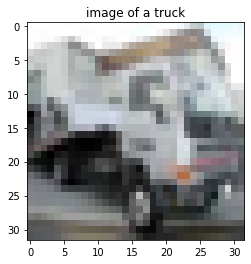

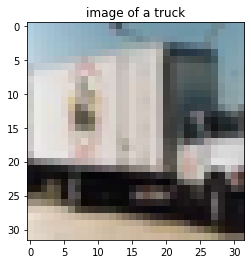

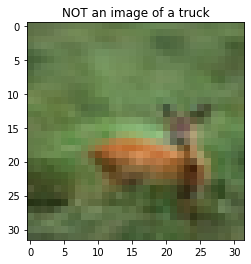

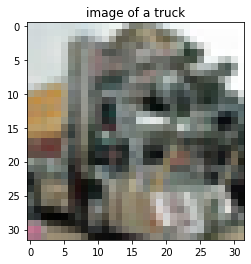

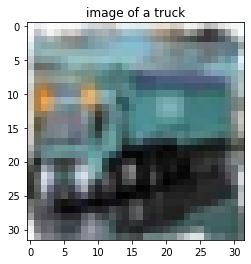

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# plt.imshow(x_train[0])
# plt.title(f'image of a {labels[int(y_train[0])]}')
# plt.show()

classes = separate_classes(x_train,y_train)

d_1, l_1 = create_dataset_1(classes, len(classes[0]))
d_2, l_2 = create_dataset_2(classes, len(classes[0]), True)



In [7]:
# m_1 = test_model(build_model_1(),'categorical_crossentropy',d_1, l_1, 128 ,10)

Epoch 1/10
352/352 [==============================] - 8s 9ms/step - loss: 2.0045 - accuracy: 0.2689
Epoch 2/10
352/352 [==============================] - 3s 9ms/step - loss: 1.4772 - accuracy: 0.4618
Epoch 3/10
352/352 [==============================] - 3s 9ms/step - loss: 1.2982 - accuracy: 0.5325
Epoch 4/10
352/352 [==============================] - 3s 9ms/step - loss: 1.1898 - accuracy: 0.5736
Epoch 5/10
352/352 [==============================] - 3s 9ms/step - loss: 1.1050 - accuracy: 0.6099
Epoch 6/10
352/352 [==============================] - 3s 9ms/step - loss: 1.0490 - accuracy: 0.6275
Epoch 7/10
352/352 [==============================] - 3s 9ms/step - loss: 0.9680 - accuracy: 0.6582
Epoch 8/10
352/352 [==============================] - 3s 9ms/step - loss: 0.9258 - accuracy: 0.6735
Epoch 9/10
352/352 [==============================] - 3s 9ms/step - loss: 0.8632 - accuracy: 0.6952
Epoch 10/10
352/352 [==============================] - 3s 9ms/step - loss: 0.8081 - accuracy: 0.7164

In [13]:
m_2 = test_model(build_model_2(),'binary_crossentropy',d_2, l_2, 32 ,10)

Epoch 1/10
313/313 [==============================] - 3s 6ms/step - loss: 1.0394 - accuracy: 0.5003
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 0.5856 - accuracy: 0.5003
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 0.5081 - accuracy: 0.5003
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 0.4781 - accuracy: 0.5003
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 0.4620 - accuracy: 0.5003
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 0.4438 - accuracy: 0.5003
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.4345 - accuracy: 0.5003
Epoch 8/10
313/313 [==============================] - 2s 6ms/step - loss: 0.4206 - accuracy: 0.5003
Epoch 9/10
313/313 [==============================] - 2s 6ms/step - loss: 0.4128 - accuracy: 0.5003
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.4023 - accuracy: 0.5003

In [9]:
y_train_1 = y_train.reshape((-1))
# p = m_1.predict(x_train[y_train_1 == 9])

In [10]:
# counts = np.zeros(10)
# for pred in p:
#     counts[np.argmax(pred)] += 1

# for i, c in enumerate(counts):
#     print(f'there were {int(c)} predictions of {labels[i]}')

In [11]:

# plt.imshow(d_2[0])
# plt.title(f'image of a {labels[int(y_train[0])]}')
# plt.show()

In [12]:
# test = np.random.choice(10,8,replace=False)
# print(test)
# labels[np.arange(len(labels)) == test]